# Simple AutoEncoder

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

### 데이터 생성 ###
# m개수만큼 0~1사으이 값을 균일 분포에서 난수 생성
angles = np.random.rand(m)
# (m, 3) shape의 빈 배열 만들기
data = np.empty((m,3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.randn(m)/2
data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [11]:
tf.reset_default_graph()

### autoencoder ###
# input 사이즈와 output size 동일하게!
# hidden size는 input보다 작게해서 압축!
n_inputs = 3
n_outputs = n_inputs
n_hidden = 2

# Placeholder serving input data
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
# X -> 은닉층의 노드로 넘어가는 layer / argument : (입력데이터, 출력노드개수)
hidden = tf.layers.dense(X, n_hidden)
# 은닉층 노드 -> Y로 넘어가는 layer / argument위와 동일
outputs = tf.layers.dense(hidden, n_outputs)

### Train parameter ###
learning_rate = 0.01
n_iterations = 1000
compressed_output = hidden

# loss는 현재 real-value값이기 때문에 MSE로 설정
# 출력값이 입력값과 얼마나 차이가 나는지 
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

# GD
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(reconstruction_loss)

### Run Tensors ###
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        # 설정한 Epoch횟수 만큼 GD 수행
        mse, _ = sess.run([reconstruction_loss, train],
                                feed_dict={X: X_train})
        print(f"MSE :{mse :.3f}")
    # 파라미터를 모두 학습시키고 난 상태에서 Test데이터 넣었을 때 압축된 값
    test_compress = compressed_output.eval(feed_dict={X: X_test})

MSE :3.117
MSE :3.018
MSE :2.922
MSE :2.828
MSE :2.737
MSE :2.649
MSE :2.563
MSE :2.480
MSE :2.399
MSE :2.322
MSE :2.247
MSE :2.174
MSE :2.104
MSE :2.037
MSE :1.972
MSE :1.909
MSE :1.849
MSE :1.791
MSE :1.735
MSE :1.681
MSE :1.629
MSE :1.578
MSE :1.530
MSE :1.483
MSE :1.438
MSE :1.394
MSE :1.352
MSE :1.311
MSE :1.272
MSE :1.234
MSE :1.197
MSE :1.161
MSE :1.127
MSE :1.093
MSE :1.061
MSE :1.030
MSE :1.000
MSE :0.971
MSE :0.943
MSE :0.917
MSE :0.891
MSE :0.866
MSE :0.842
MSE :0.820
MSE :0.798
MSE :0.777
MSE :0.757
MSE :0.738
MSE :0.720
MSE :0.703
MSE :0.687
MSE :0.671
MSE :0.656
MSE :0.642
MSE :0.628
MSE :0.616
MSE :0.604
MSE :0.592
MSE :0.581
MSE :0.571
MSE :0.561
MSE :0.551
MSE :0.542
MSE :0.534
MSE :0.526
MSE :0.518
MSE :0.511
MSE :0.504
MSE :0.497
MSE :0.490
MSE :0.484
MSE :0.478
MSE :0.472
MSE :0.467
MSE :0.461
MSE :0.456
MSE :0.451
MSE :0.446
MSE :0.441
MSE :0.436
MSE :0.431
MSE :0.427
MSE :0.422
MSE :0.418
MSE :0.413
MSE :0.409
MSE :0.404
MSE :0.400
MSE :0.396
MSE :0.392
MSE :0.388

MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.162
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161
MSE :0.161

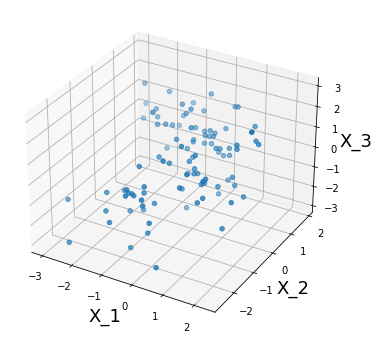

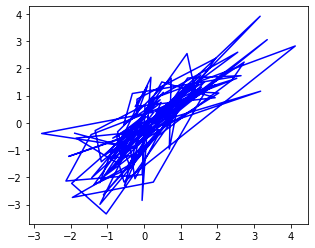

In [16]:
### 3차원 그림과 2차원 그림 시각화 ###
fig = plt.figure(figsize=(8,6))
# 3차원 그림 fig 설정
ax = fig.gca(projection='3d')
# 테스트 데이터의 1번째, 2번째, 3번째 각 열에 해당하는 데이터 3차원으로 한 번에 산점도 그리기
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2])
ax.set_xlabel("X_1", fontsize=18)
ax.set_ylabel("X_2", fontsize=18)
ax.set_zlabel("X_3", fontsize=18)
plt.show()

# 테스트 데이터를 넣어서 압축한 값(은닉층 값) 그래프
fig = plt.figure(figsize=(5,4))
# n_hidden=2이기 떄문에 2차원의 데이터인 상태
plt.plot(test_compress[:,0], test_compress[:,1], 'b')
plt.show()

# Stacked AutoEncoder

``from functools import partial``설명

In [19]:
from functools import partial

# power라는 함수를 직접 정의
def power(base, exponent):
    return base ** exponent

# 이미 존재하는 power 함수를 사용하지 않는 경우(partial 미사용)
def square(base):
    return base**2

# 이미 존재하는 power 함수를 사용(partial 사용)
square = partial(power, exponent=2)

result = square(4)
print(result)

16


- ``np.random.permutation``
    * array를 복사한 후 셔플을 함. 즉, 새로운 array가 생성
    * integer를 인자로 넣으면 -> np.arange(integer)를 생성하는데, 이 때 array 요소값들을 셔플해서 나타냄!
    
- ``np.random.shuflle``
    * array를 셔플한후 inplace함. 즉, 기존의 array를 셔플해서 덮음!
    

- ``np.array_split``: array를 행 또는 열 방향으로 분할
    * np.array_split(array, 분할할 개수, 축방향)
    
    
- return이 아닌 ``yield(값을 하나씩 산출하다!)`` 사용 이유
    * yield가 들어간 shuffle_batch함수가 for 문안에서 사용되고 있음
    * 따라서 shuflle_batch함수를 next()라는 yield와 관련된 함수를 사용해서 계속적으로 iteration이 소진될 때까지 순차적으로 하나씩 반환함!
    
    
- ``tf.add vs tf.add_n``
    * tf.``add_n``는 add에 비해 많은 양의 텐서를 한 번에 처리 가능!
    * 단, ``add_n``은 턴세들 넣어줄 때 만드시 대괄호 [] 에 넣어주어야 함!

In [31]:
tf.reset_default_graph()

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
# A shape of 'train_x' : (batch_size, weight, height)
train_x = train_x.astype(np.float32).reshape(-1, 28*28) / 255.0
test_x = test_x.astype(np.float32).reshape(-1, 28*28) / 255.0
train_y = train_y.astype(np.float32)
test_y = test_y.astype(np.float32)

train_x, valid_x = train_x[5000:], train_x[:5000]
train_y, valid_y = train_y[5000:], train_y[:5000]

### Create Mini-batch
# len(nd_array) => 가장 바깥쪽 차원[] 안에 있는 요소들의 개수를 셈!
def shuflle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) / batch_size
    # array_split하면 분할한 array들을 갖고 있는 list type으로 됨!->for문 사용가능
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

In [64]:
### Stacked AutoEncoder Hyperparameters - symmetric 구조! ###
n_inputs = 28*28
# encoder units
n_encoder = 300
# code units
n_code = 150
# decoder units(encoder와 symmetric)
n_decoder = n_encoder
n_outputs = n_inputs

## Train Parameters ##
learning_rate = 0.01
# Regularization for preventing overfitting
l2_reg = 0.0001
# num of epoch
n_epochs = 5
# batch_size
batch_size = 150
# 1 epoch를 돌동안 몇번의 batch_size가 돌아갈 것인지!
n_batches = len(train_x) // batch_size

# parameter를 He 초기화 방법 사용
he_init = tf.keras.initializers.he_normal()
# layer에 L2 Norm 적용하는 텐서
l2_regularizer = tf.contrib.layers.l2_regularizer(scale=l2_reg)
# parital을 이용해서 여러번 입력하는 코드 줄이기!
# partial(이용할 함수, 이용할 함수의 추가 파라미터들 정의)
dense_layer = partial(tf.layers.dense,
                     activation=tf.nn.relu,
                     kernel_initializer=he_init,
                     kernel_regularizer=l2_regularizer)

### Build Stacked AutoEncoder ###
inputs = tf.placeholder(tf.float32, shape=[None, n_inputs])
# dense_layer이 tf.layers.dense를 담고있는데, tf.layers.dense(입력데이터, 출력노드개수)인자 필요!
encoder = dense_layer(inputs, n_encoder)
code = dense_layer(encoder, n_code)
decoder = dense_layer(code, n_decoder)
# 현재 dense_layer의 디폴트 활성함수를 relu로 설정해놓아서 최종 결과물 출력시는 활성함수 없이 설정
outputs = dense_layer(decoder, n_outputs, activation=None)

# Cost function
reconstruction_loss = tf.reduce_mean(tf.square(inputs - outputs))
# 정규화시킨 Cost를 만들기 위해 정규화 항 설정
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

# 원래 Cost와 정규화 항 더해서 정규화시킨 새로운 Cost function
# reconstruction_loss는 평균값인 Scalar값, reg_losses는 28개 요소를 갖고 있는 1차원 리스트
reg_cost = tf.add_n([reconstruction_loss] + reg_losses)
# GD
train = tf.train.AdamOptimizer(learning_rate).minimize(reg_cost)

### Run Tensors ###
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    n_batches = len(train_x) // batch_size
    for epoch in range(n_epochs):
        for iteration in range(n_batches):
            batch_x, batch_y = next(shuflle_batch(train_x, train_y, batch_size))
            # 각 Mini-batch에서 GD 수행
            _, input_x, output_x = sess.run([train, inputs, outputs],
                                           feed_dict={inputs: batch_x})
        # 한 번 Epoch 끝날 때마다 Cost값 출력
        cost_val = reg_cost.eval(feed_dict={inputs: batch_x})
        recon_loss, reg_loss = sess.run([reconstruction_loss,
                                        reg_losses],
                                       feed_dict={inputs: batch_x})
        reg_cost_val = reg_cost.eval(feed_dict={inputs: batch_x})
        print("# reconstruction_loss shape: ", np.array(recon_loss).shape)
        print("# reg_loss shape: ", np.array(reg_loss).shape)
        print("# reg_cost shape: ", np.array(reg_cost_val.shape), type(reg_cost_val), reg_cost_val)
        #print(recon_loss,'\n',reg_loss)
        #print("# reg_cost :", reg_cost_val)
        print(f"Epoch: {epoch+1}, Regularized MSE: {cost_val:.3f}")
        print()

# reconstruction_loss shape:  ()
# reg_loss shape:  (68,)
# reg_cost shape:  [] <class 'numpy.float32'> 0.032735676
Epoch: 1, Regularized MSE: 0.033

# reconstruction_loss shape:  ()
# reg_loss shape:  (68,)
# reg_cost shape:  [] <class 'numpy.float32'> 0.03158902
Epoch: 2, Regularized MSE: 0.032

# reconstruction_loss shape:  ()
# reg_loss shape:  (68,)
# reg_cost shape:  [] <class 'numpy.float32'> 0.03024265
Epoch: 3, Regularized MSE: 0.030

# reconstruction_loss shape:  ()
# reg_loss shape:  (68,)
# reg_cost shape:  [] <class 'numpy.float32'> 0.029671382
Epoch: 4, Regularized MSE: 0.030

# reconstruction_loss shape:  ()
# reg_loss shape:  (68,)
# reg_cost shape:  [] <class 'numpy.float32'> 0.028287072
Epoch: 5, Regularized MSE: 0.028



In [60]:
a = tf.constant(3, dtype=tf.float32)
b = tf.constant(1, dtype=tf.float32)
sum_ = tf.add(a, b)
tf.Session().run(sum_)

4.0

In [62]:
a = np.array([1])
a.shape


(1,)